#기후 데이터를 이용한 강수 여부 예측 프로젝트  
* 모둠원 이름: 이주원, 김석준, 김태영, 정희우
* 탐구 동기:  외출하기 전 우리는 일기예보를 보면서 오늘 비가 오는지 안오는지 확인하고 우산을 챙길지 결정하고는 한다. 이때, 비가 올지의 여부는 어떤 기상 데이터 요소들을 고려하여 판단할 수 있을지 궁금증이 생겼고, 비 오는 날과 오지 않는 날을 구분할 때 어떤 요소가 중요하게 작용하는지 궁금해졌다. 온도, 습도 등의 특징들을 가지고 비가 올지 판단하는 방법을 분석하고, 그 기능을 수행하는 인공지능을 우리도 만들 수 있지 않을까? 생각하여 이번 주제를 선정하게 되었다. 
* 탐구 문제: (해결하고자 하는 **융합** 문제 상황과 만들고자 하는 인공지능으로 확인하려는 내용) 일별 기온, 바람, 습도 등의 기후 데이터가 주어졌을 때, 이를 통해 비가 오는 여부를 예측할 수 있을까?
* 융합 분야: 지구과학
* 입력 값 / 출력 값: 일별 기후 데이터(바람, 기온, 습도 등) / 비가 오는 여부(0 or 1)

#1. 데이터 준비
* (데이터 소개) 기상청에서 공개하고 있는 종관기상관측 자료 데이터를 사용하였다. 지역별로 기온, 풍속, 풍정합, 최대풍향, 해면기압 등 다양한 기상 데이터를 공개하고 있으며, 그 중 2000.1.1 부터 2022.12.03 기간 동안의 대전 지역 데이터를 사용하였다.
* (데이터 출처) https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

In [2]:
import pandas as pd
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRHAFo6S-F12VlH2PQqYDNH0ZAORzDb8YwG_H8QFWBD8sjMYVE2O4XS_5egH4ic8rGKEh9m-uLdOVEe/pub?output=csv')
print(df)
print(df.head(5))

       지점 지점명          일시  평균기온(°C)  최저기온(°C)  최고기온(°C)  일강수량(mm)  최대 풍속(m/s)  \
0     133  대전  2000-01-01       4.4      -1.7      11.2       NaN         7.2   
1     133  대전  2000-01-02       4.0       0.8       7.6       2.5         7.3   
2     133  대전  2000-01-03       0.1      -3.0       4.4       NaN         8.4   
3     133  대전  2000-01-04      -0.5      -5.6       5.6       NaN         4.4   
4     133  대전  2000-01-05       3.8      -1.2       7.4       8.3         8.4   
...   ...  ..         ...       ...       ...       ...       ...         ...   
8368  133  대전  2022-11-29       8.5       1.3      12.3       6.7         6.8   
8369  133  대전  2022-11-30      -2.9      -5.5       1.3       0.0         7.4   
8370  133  대전  2022-12-01      -3.3      -7.4       1.4       NaN         3.7   
8371  133  대전  2022-12-02      -1.6      -6.1       4.0       NaN         2.6   
8372  133  대전  2022-12-03       2.7      -2.3       6.8       0.0         5.5   

      평균 풍속(m/s)  풍정합(100m)

In [3]:
# 비가 오면 1, 비가 안오면 0으로 바꾸는 방식
import numpy as np
df['일강수량(mm)'] = np.select(
    [df['일강수량(mm)'] > 0,
     df['일강수량(mm)'] <= 0],
    [1, 0]
)
df = df.fillna(0)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8373 entries, 0 to 8372
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   지점                8373 non-null   int64  
 1   지점명               8373 non-null   object 
 2   일시                8373 non-null   object 
 3   평균기온(°C)          8373 non-null   float64
 4   최저기온(°C)          8373 non-null   float64
 5   최고기온(°C)          8373 non-null   float64
 6   일강수량(mm)          8373 non-null   int64  
 7   최대 풍속(m/s)        8373 non-null   float64
 8   평균 풍속(m/s)        8373 non-null   float64
 9   풍정합(100m)         8373 non-null   float64
 10  최다풍향(16방위)        8373 non-null   float64
 11  평균 이슬점온도(°C)      8373 non-null   float64
 12  최소 상대습도(%)        8373 non-null   int64  
 13  평균 상대습도(%)        8373 non-null   float64
 14  평균 현지기압(hPa)      8373 non-null   float64
 15  최고 해면기압(hPa)      8373 non-null   float64
 16  최저 해면기압(hPa)      8373 non-null   float64


In [5]:
X = df[['평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '최대 풍속(m/s)', '평균 풍속(m/s)', '풍정합(100m)', '최다풍향(16방위)', '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도(%)', '평균 현지기압(hPa)', '최고 해면기압(hPa)', '최저 해면기압(hPa)', '평균 해면기압(hPa)', '가조시간(hr)', '1시간 최다일사량(MJ/m2)', '합계 일사량(MJ/m2)', '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)', '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)', '1.0m 지중온도(°C)', '1.5m 지중온도(°C)', '3.0m 지중온도(°C)', '5.0m 지중온도(°C)', '합계 대형증발량(mm)', '합계 소형증발량(mm)']].copy()
y = df['일강수량(mm)'].copy()
print(y.value_counts())

0    5745
1    2628
Name: 일강수량(mm), dtype: int64


#2. 탐색적 데이터 분석

In [6]:
import numpy as np
data=np.array(df)
max_windspeed=[]
ave_humidity=[]
tot_insolation=[]
rain=[]
for row in data:
  max_windspeed.append(row[8])
  ave_humidity.append(row[20])
  tot_insolation.append(row[13])
  rain.append(row[6])

[2628, 5745]



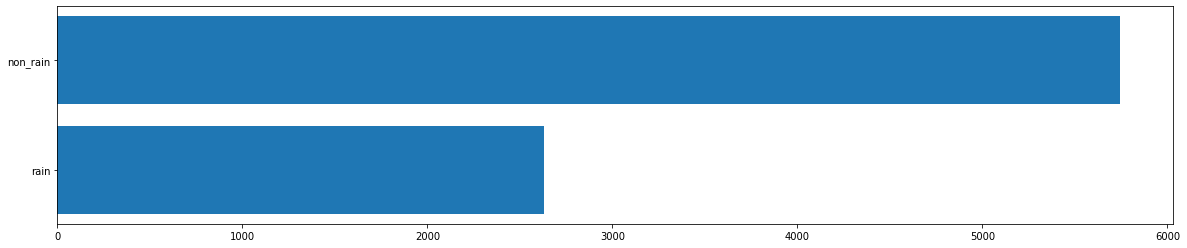

In [7]:
import matplotlib.pyplot as plt
count=[0,0]

for i in range(len(rain)):
  if(rain[i]>0):
    count[0]+=1
  elif(rain[i]<=0):
    count[1]+=1

print(count)
print()

flg=plt.figure(figsize=(20,4))
plt.barh(width=count,y=('rain','non_rain'))
plt.show()

평균값 1.9597412480974106 1.6846127067014809



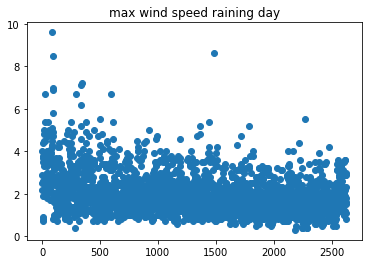

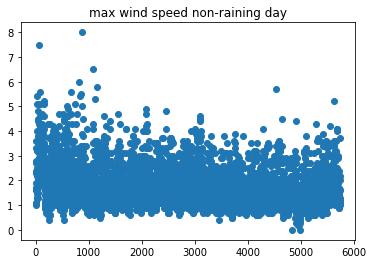

In [8]:
import matplotlib.pyplot as plt

max_windspeed1=[]
max_windspeed2=[]
a=0
b=0
for i in range(len(max_windspeed)):
  if(rain[i]>0):
    max_windspeed1.append(max_windspeed[i])
    a+=max_windspeed[i]
  elif(rain[i]<=0):
    max_windspeed2.append(max_windspeed[i])
    b+=max_windspeed[i]

print('평균값',a/len(max_windspeed1),b/len(max_windspeed2))
print()

x=[i for i in range(len(max_windspeed1))]
plt.scatter(x,max_windspeed1)
plt.title('max wind speed raining day')
plt.show()

x=[i for i in range(len(max_windspeed2))]
plt.scatter(x,max_windspeed2)
plt.title('max wind speed non-raining day')
plt.show()

평균값 9.748637747336387 16.655016536118257



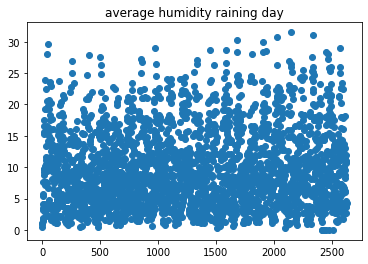

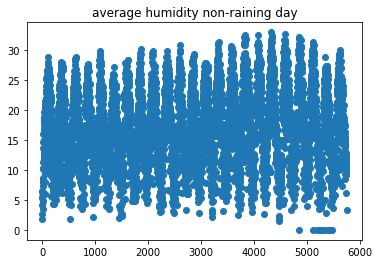

In [9]:
import matplotlib.pyplot as plt

ave_humidity1=[]
ave_humidity2=[]
a=0
b=0 
for i in range(len(ave_humidity)):
  if(rain[i]>0):
    ave_humidity1.append(ave_humidity[i])
    a+=ave_humidity[i]
  elif(rain[i]<=0):
    ave_humidity2.append(ave_humidity[i])
    b+=ave_humidity[i]

print('평균값',a/len(ave_humidity1),b/len(ave_humidity2))
print()


x=[i for i in range(len(ave_humidity1))]
plt.scatter(x,ave_humidity1)
plt.title('average humidity raining day')
plt.show()

x=[i for i in range(len(ave_humidity2))]
plt.scatter(x,ave_humidity2)
plt.title('average humidity non-raining day')
plt.show()

평균값 78.74162861491554 62.2450304612688



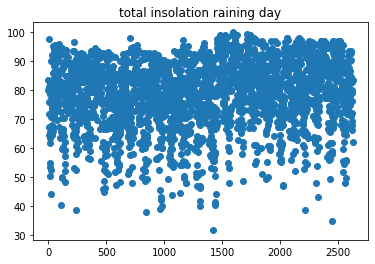

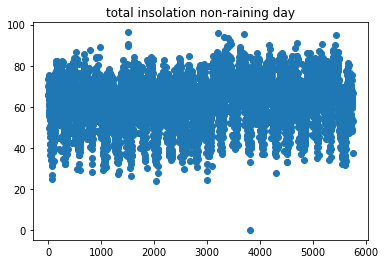

In [10]:
import matplotlib.pyplot as plt

tot_insolation1=[]
tot_insolation2=[]
a=0
b=0 
for i in range(len(tot_insolation)):
  if(rain[i]>0):
    tot_insolation1.append(tot_insolation[i])
    a+=tot_insolation[i]
  elif(rain[i]<=0):
    tot_insolation2.append(tot_insolation[i])
    b+=tot_insolation[i]

print('평균값',a/len(tot_insolation1),b/len(tot_insolation2))
print()

x=[i for i in range(len(tot_insolation1))]
plt.scatter(x,tot_insolation1)
plt.title('total insolation raining day')
plt.show()

x=[i for i in range(len(tot_insolation2))]
plt.scatter(x,tot_insolation2)
plt.title('total insolation non-raining day')
plt.show()

#3. 모델 구현
* (사용한 알고리즘) 결정 트리 

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
y_train_value = y_train.value_counts()
print(y_train_value)
print(y_test.value_counts())

#y_train.plot.bar()
#plt.title('Quantity of rain in the dataset')
#plt.xticks(rotation=0)
#plt.show()

0    4027
1    1834
Name: 일강수량(mm), dtype: int64
0    1718
1     794
Name: 일강수량(mm), dtype: int64


In [13]:
model = DecisionTreeClassifier()
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = cross_validate(model, X_train,y_train,cv=splitter)
print(np.mean(res['test_score']))

0.809074312027955


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred, labels=[0,1])
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred, pos_label = 0)
    recall = recall_score(y_test, pred, average='binary',pos_label=0)
    f1 = f1_score(y_test, pred, average='binary',pos_label=0)
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}, F1점수:{}'.format(accuracy, precision, recall, f1))

In [15]:
model.fit(X_train,y_train)
pred1 = model.predict(X_test)
get_clf_eval(y_test,pred1)

Confusion Matrix
[[1464  254]
 [ 265  529]]
정확도:0.7933917197452229, 정밀도:0.8467322151532678, 재현율:0.8521536670547147, F1점수:0.8494342906875544


In [16]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

1.0
0.7933917197452229


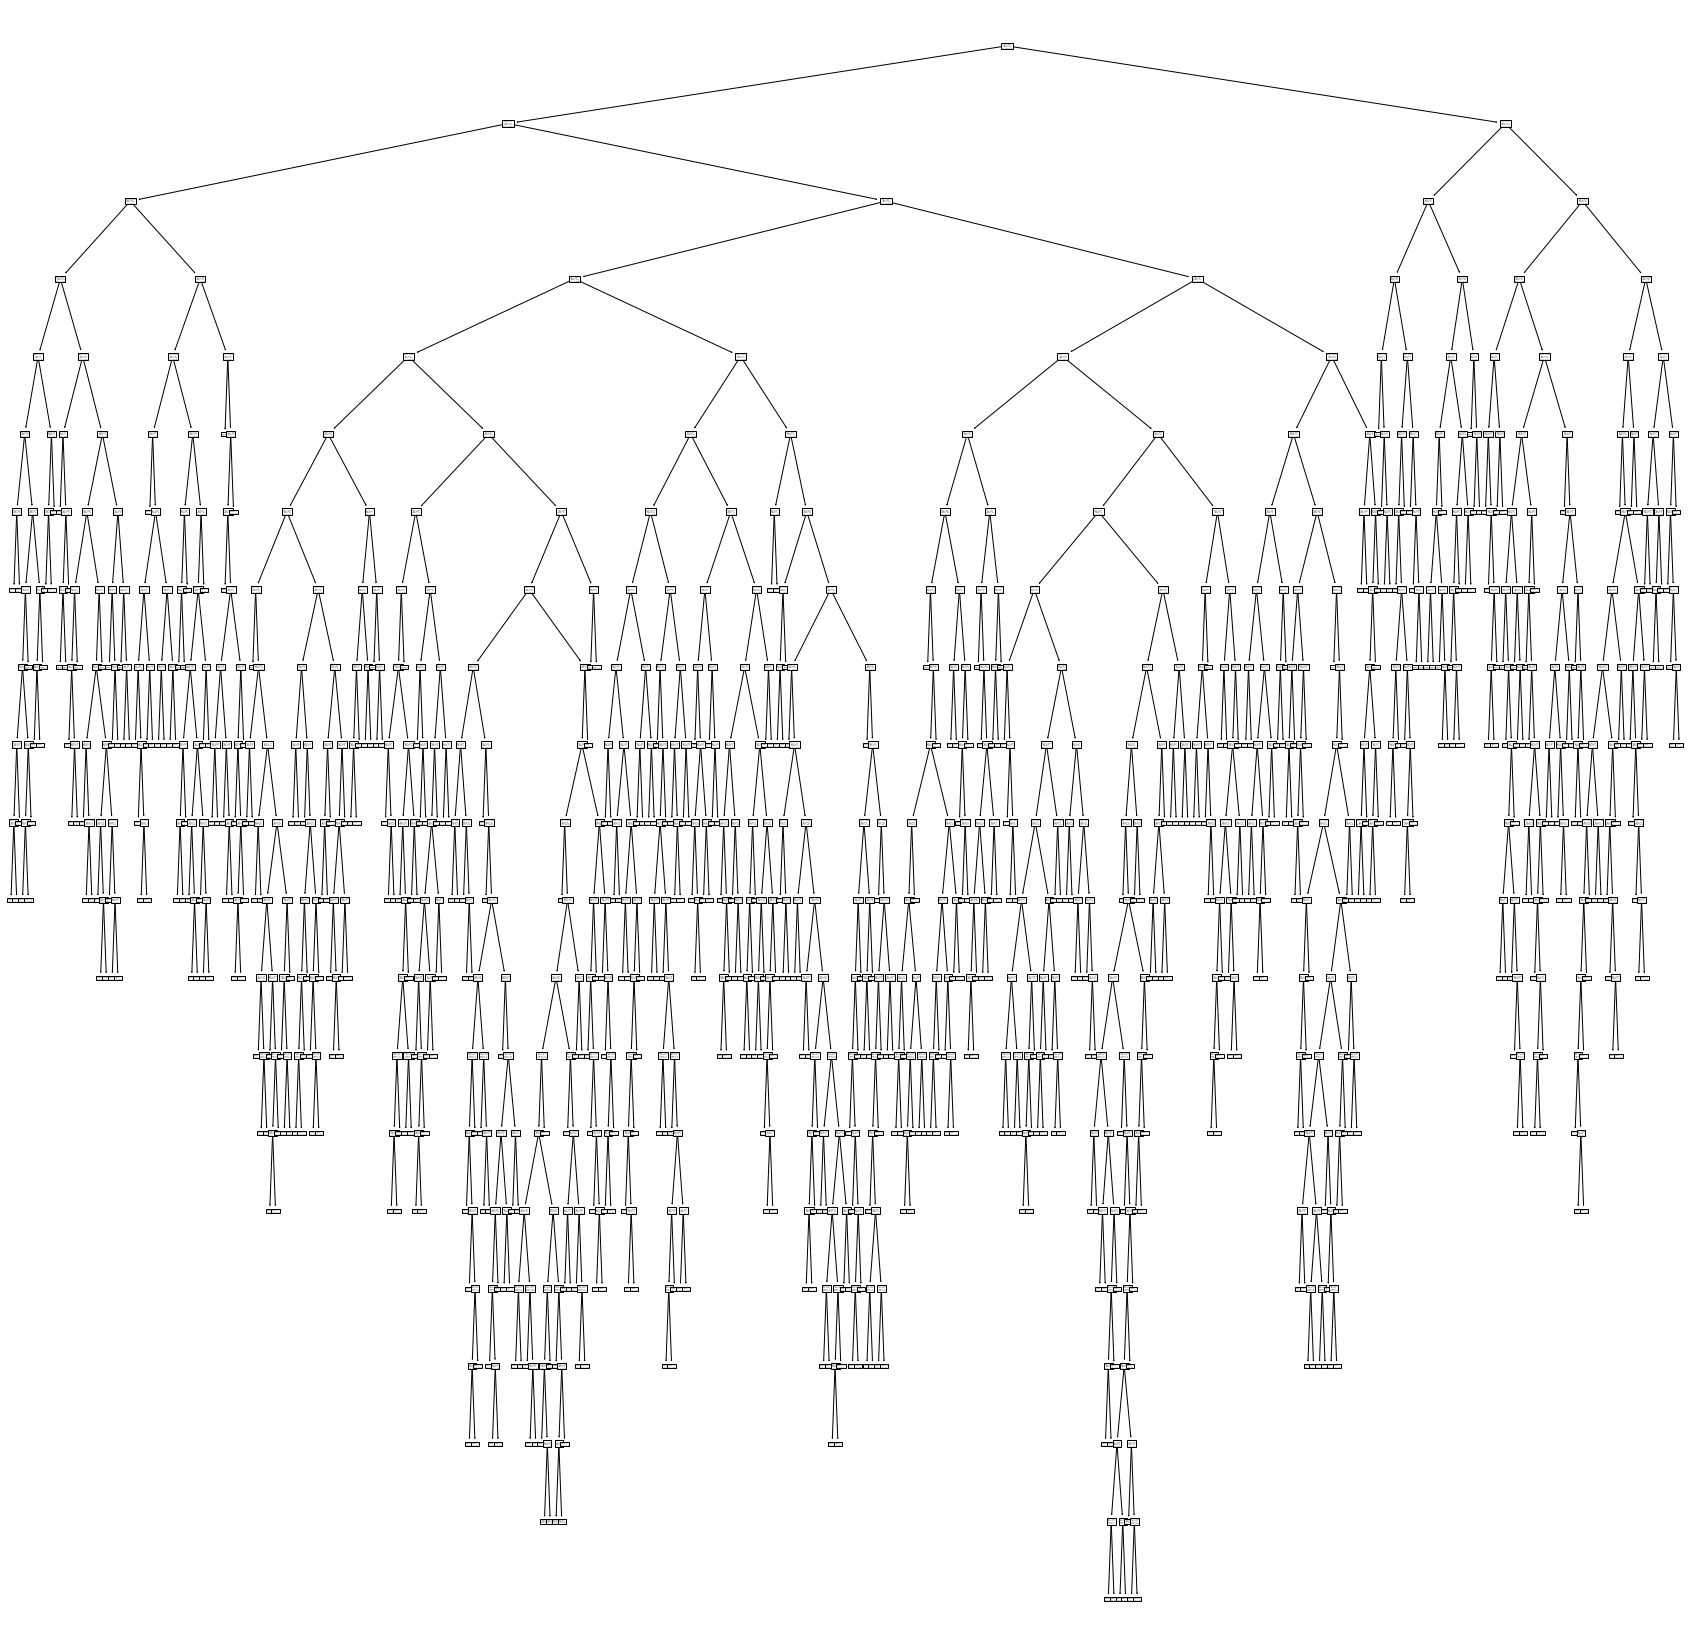

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 30))
plot_tree(model)##dt1 결정트리 시각화
plt.show()

과대적합이 심하게 발생하므로, 이를 방지하기 위한 처리가 필요하다.

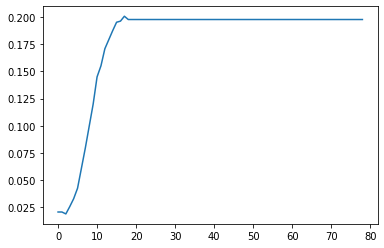

최적의 max depth 값 : 3


In [18]:
#과대적합 방지 처리
err=[0,]
for i in range (1,80):
  dt = DecisionTreeClassifier(max_depth=i,random_state=42)
  dt.fit(X_train, y_train)
  err.append(abs(dt.score(X_train,y_train)-dt.score(X_test,y_test))) #트리의 최대 깊이에 따른 훈련 데이터와 테스트 데이터의 차이 저장
plt.plot(err[1:]) #그래프를 통해 시각화
plt.show()
print("최적의 max depth 값 : %d"%(err.index(min(err[1:]))))#차이가 가장 작을 때의 트리의 최대 깊이

In [19]:
model = DecisionTreeClassifier(max_depth=3)

#4. 모델 평가

In [20]:
splitter=StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
res = cross_validate(model, X_train,y_train,cv=splitter)
print(np.mean(res['test_score']))

0.8324493723508788


In [21]:
model.fit(X_train,y_train)
pred1 = model.predict(X_test)
get_clf_eval(y_test,pred1)

Confusion Matrix
[[1622   96]
 [ 350  444]]
정확도:0.822452229299363, 정밀도:0.8225152129817445, 재현율:0.9441210710128056, F1점수:0.8791327913279132


In [22]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8413240061422965
0.822452229299363


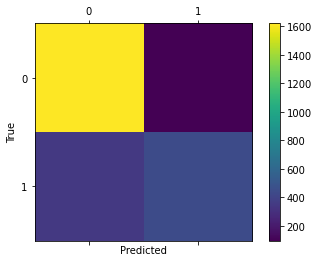

In [23]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

conf_mat=confusion_matrix(y_test,pred1)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat)
fig.colorbar(cax)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#5. 결과 확인 및 해석


In [24]:
x = 0;
for i in X.columns:
  print(i, model.feature_importances_[x],sep=' : ')
  x += 1

평균기온(°C) : 0.0
최저기온(°C) : 0.0
최고기온(°C) : 0.0
최대 풍속(m/s) : 0.04063426930708317
평균 풍속(m/s) : 0.0
풍정합(100m) : 0.0
최다풍향(16방위) : 0.0
평균 이슬점온도(°C) : 0.0
최소 상대습도(%) : 0.0
평균 상대습도(%) : 0.8232764433163189
평균 현지기압(hPa) : 0.0
최고 해면기압(hPa) : 0.0
최저 해면기압(hPa) : 0.043855066969450136
평균 해면기압(hPa) : 0.0
가조시간(hr) : 0.0
1시간 최다일사량(MJ/m2) : 0.0
합계 일사량(MJ/m2) : 0.09223422040714775
평균 지면온도(°C) : 0.0
최저 초상온도(°C) : 0.0
평균 5cm 지중온도(°C) : 0.0
평균 10cm 지중온도(°C) : 0.0
평균 20cm 지중온도(°C) : 0.0
평균 30cm 지중온도(°C) : 0.0
0.5m 지중온도(°C) : 0.0
1.0m 지중온도(°C) : 0.0
1.5m 지중온도(°C) : 0.0
3.0m 지중온도(°C) : 0.0
5.0m 지중온도(°C) : 0.0
합계 대형증발량(mm) : 0.0
합계 소형증발량(mm) : 0.0


In [25]:
import numpy as np
df=pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQD046MWXTOrWtUtLfVKUirb_OCIfOxfDSjlOF_QkGO8RfisqRlUO2F3UjNi1Uz0Alhd_h-bDt5p4n4/pub?gid=0&single=true&output=csv')
df = df.fillna(0)
#2022/12/4 의 강수 예측
a=np.array(df.iloc[30])
b=a[3:33]
b=b.reshape(-1,30)
print('예측 값 =',model.predict(b))
print('실제 값 =',a[33])

예측 값 = [0]
실제 값 = 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


#6. 활용 방안 및 기대 효과
* (활용 방안) 일별 기후 데이터를 학습시켰을 때 인공지능을 이용해 강수 예측이 가능하다는 것을 확인하였다. 이 프로젝트를 조금 더 확장시켜 더 많은 기후 특징들을 사용해 학습시킨 모델을 이용한다면 정확도가 더 향상될 것이고, 공공 행사 등 강수 여부가 중요한 일정에 이 인공지능을 사용하여 비를 예측하는 데 활용할 수 있을 것이다. 
* (기대 효과) 인공지능을 통해 강수 여부를 더 정확하게 예측하여 실생활에서 사람들에게 도움을 줄 수 있다. 또한 본 프로젝트의 모델은 결정트리 알고리즘을  이용하여 결과값이 어떤 과정을 거쳐 도출되었는지 이해하기 쉽고 높은 정확도를 보인다. 즉 어떠한 요소가 강수 여부를 예측할 때 주요하게 영향을 끼치는지 분석할 수 있었고, 앞으로 기상을 연구할 때 본 프로젝트의 결과가 도움이 될 수 있을 것이다.

훈련한 결정트리 모델을 토대로 2022년 12월 4일의 강수 여부를 예측해보았다.  
예측 결과 0, 즉 비가 오지 않는다고 판단하였는데, 실제로도 비가 오지 않았음을 확인하였다.